# Analisys

##### First of all, we have to import the libraries we are going to need. Once done, we can start the adventure.

In [33]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import random

To be well prepared, we must load the DataFrame we obtained earlier and examine it, in order to be guided by the data, and to know where to start our way.

In [143]:
pokemon = pd.read_csv("poks.csv")

In [144]:
pokemon.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Evolution,Region
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,Base,kanto
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,Level_up,kanto
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,Level_up,kanto
3,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,Base,kanto
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,Level_up,kanto
5,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,Level_up,kanto
6,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,Base,kanto
7,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,Level_up,kanto
8,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,Level_up,kanto
9,10,Caterpie,Bug,NaN,45,30,35,20,20,45,1,Base,kanto


In [146]:
pokemon.shape

(693, 13)

In [148]:
pokemon.size

9009

Before starting our adventure, we will have to get a Pokemon partner to accompany us. To do this, we will have to decide which Pokemon will be our first companion. In general, when you start your adventure, you are given the choice between three types of Pokemos, one of plant type, one of water type or one of fire type. Well, for it, we are going to see, which of the three types comes better to us to begin, for it, we will compare the stats of the pokemon of all the types.

In [4]:
means_types = round(pokemon.groupby(["Type 1"])["Attack", "Defense", "Sp. Atk", "Sp. Def"].mean(), 2)
#Here I want to know the average stats (attack, defense, special attack and special defense) of each main type, 
#grouping them together. 
#For this, we use groupby, to later, make the average and round to two decimal places.

<ipython-input-4-164f5a293876>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means_types = round(pokemon.groupby(["Type 1"])["Attack", "Defense", "Sp. Atk", "Sp. Def"].mean(), 2)


In [5]:
means_types #check the data

,Attack,Defense,Sp. Atk,Sp. Def
Type 1,,,,
Bug,65.49,68.69,54.34,63.02
Dark,84.38,66.04,65.69,65.46
Dragon,96.65,71.06,65.18,74.00
Electric,65.13,64.00,82.92,71.13
Fairy,57.19,63.88,75.25,83.88
Fighting,94.72,64.28,48.56,63.68
Fire,77.88,61.95,80.88,66.51
Flying,50.00,57.50,71.00,60.00
Ghost,68.25,79.39,73.43,73.18


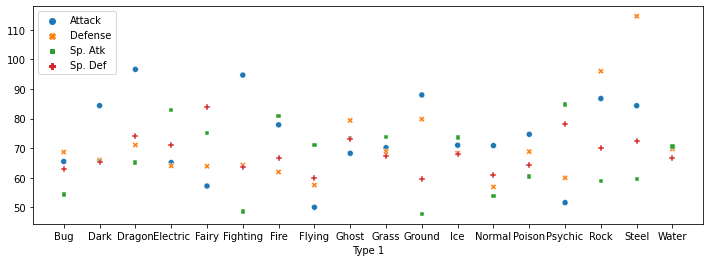

In [154]:
plt.rcParams["figure.figsize"] = [12.0, 4.0]
figure1 = sns.scatterplot(data = means_types)
#realizamos un scatterplot para tener información visual sobre cada tipo de pokemon. 
#En el eje x esta cada tipo de pokemon, en el eje y el valor de los stats, y los puntos son cada stat.

Wow, from what we see here, it's not good for us to meet a **steel** guy around here haha.
This graphic can be very useful in the adventure. For example, it's very useful to have a **fighting** type, but if the opponent brings out a **psychic** type with a powerful special attack, we would take out a **fairy** type to counteract the special attack. 
Well, well, we are doing well. But we have to stop and analyze **fire, grass and water**.

In [6]:
means_starters = [means_types.loc["Water"], means_types.loc["Fire"], means_types.loc["Grass"]]
#store the three types in a variable.

In [7]:
means_starters = pd.DataFrame(means_starters)

In [8]:
means_starters = means_starters.T
means_starters
#create a DataFrame

,Water,Fire,Grass
Attack,70.26,77.88,70.16
Defense,69.77,61.95,68.84
Sp. Atk,70.57,80.88,73.69
Sp. Def,66.63,66.51,67.44


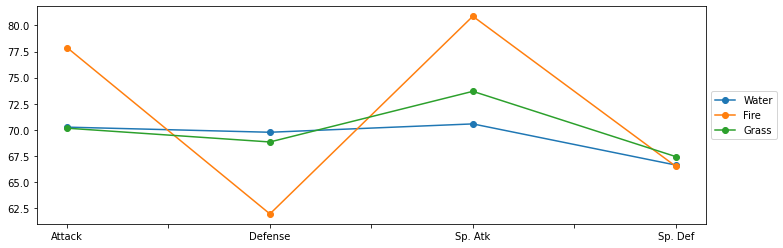

In [155]:
figure2 = means_starters.plot(marker="o")
figure2.legend(loc="center left", bbox_to_anchor=(1, 0.5))
#check the data and the line graphic.

Perfect! As we can see, the **fire type** is very strong, its attacks are above the rest, however, it has low defense, and that can be a problem. You can see that the **grass type** is more balanced in its stats, so, that's going to be our choice. Let's see it with bars to see if it looks clearer.

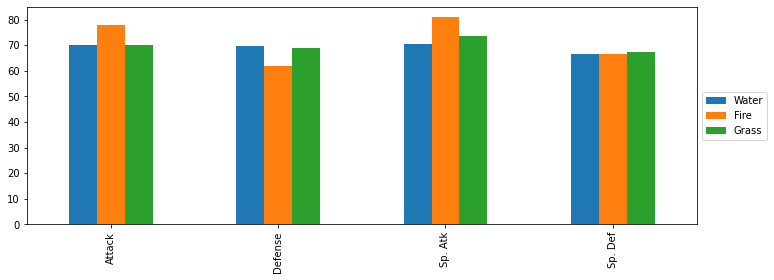

In [156]:
figure3 = means_starters.plot(kind="bar")
figure3.legend(loc="center left", bbox_to_anchor=(1, 0.5))
#and bar graphic

mmm...no, no, definitely, the other graphic was better.

Great! The professor is going to give us a plant type pokemon, we don't know which one it is. **It can be anyone**.

In [11]:
pokemon_choice = list(pokemon[pokemon["Type 1"] == "Grass"]["Name"])
#with the random library we choose a plant pokemon at random

In [12]:
my_team = [random.choice(pokemon_choice)]

In [13]:
my_team
#add to team

['Bulbasaur']

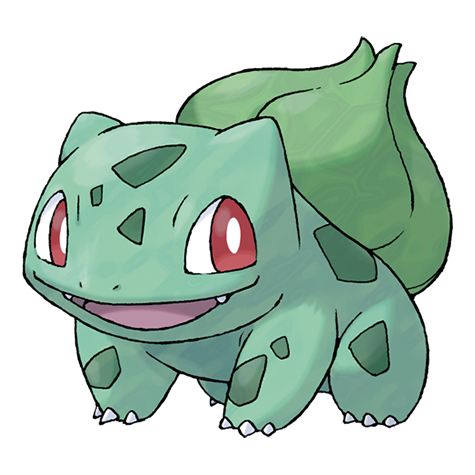

Great!!! Our first partner is bulbasaur!!!! Let's see his stats!!

In [126]:
bulbasaur = pokemon[pokemon["Name"] == "Bulbasaur"]
bulbasaur
#select "Bulbasaur" from the DataFrame

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Evolution,Region
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,Base,kanto


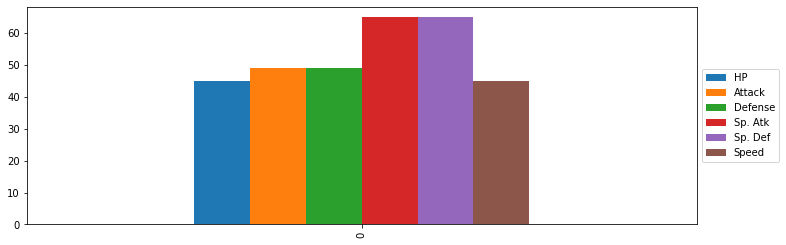

In [157]:
b_stats = bulbasaur[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
figure4 = b_stats.plot(kind="bar")
figure4.legend(loc="center left", bbox_to_anchor=(1, 0.5))
#take a graphic about Bulbasaur stats

Wow, you seem to be better at offense and special defense.

When starting out, it is necessary to know which pokemon we are most likely to encounter and which are less likely to be encountered. Let's see the number of pokemon for each main type.

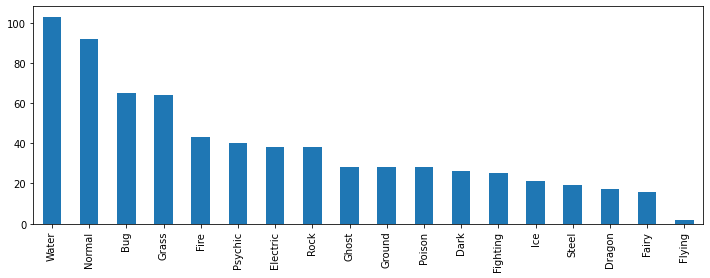

In [160]:
figure5 = pokemon["Type 1"].value_counts().plot(kind="bar")

It seems that the most numerous are the water and **normal types**, but, wait a minute, the least numerous are the **flying types**? They are quite common...mmm...we should take into account the secondary type as well.

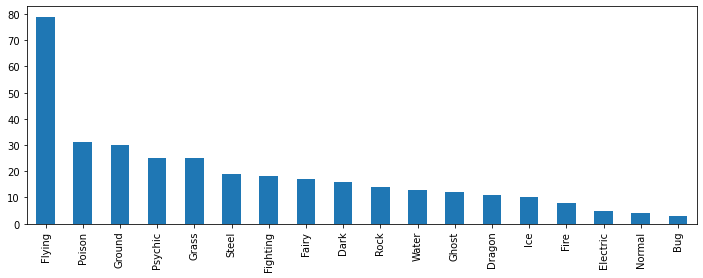

In [182]:
figure6 = pokemon["Type 2"].value_counts().plot(kind="bar")

It was clear, now the **flying type** pokemon are the most numerous if we take into account the secondary type, and the **bug type** the least. Let's take into account the totality of the types to get an idea.

In [183]:
pokemon_total_types = pokemon["Type 1"].value_counts() + pokemon["Type 2"].value_counts()
#add the value of each type

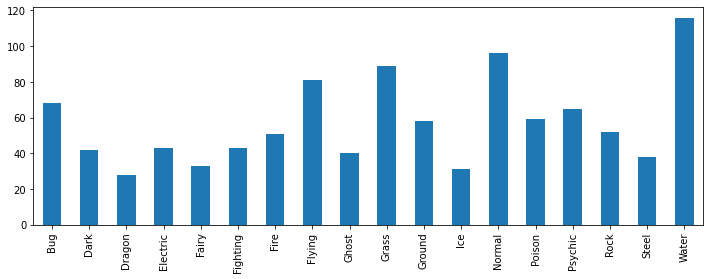

In [184]:
figure7 = pokemon_total_types.plot(kind="bar")

It seems that the **water types** are the most numerous, the ones we are most likely to meet, so we have done well to have a **grass type** as a partner. It is followed by the **normal type** and the **grass type**. On the other hand, the rarest and most difficult to find are the **ice, fairy and dragon types**.

Great! We've already got an idea of what awaits us on our adventure, but where do we start?
Traveling to another **region** cannot be taken lightly, so let's take a look at the **number of species** native to **each region**, to have data to make a decision.

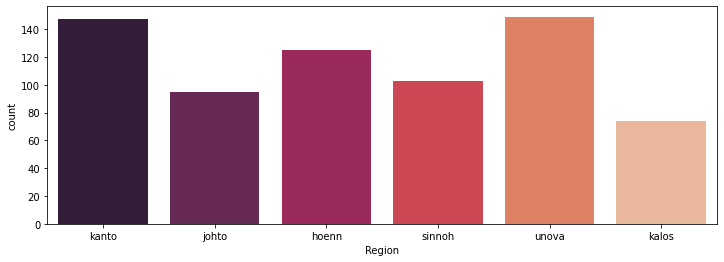

In [161]:
figure8 = sns.countplot(data = pokemon, x = "Region", palette = "rocket")

Kanto and Unova are the places where there are more different native species. In Kalos there is a significant decrease, perhaps due to the irruption of species from other regions. 

We have to take into account how **resistant** the pokemon of these regions are, we don't want our beloved Bulbasaur to get hurt.

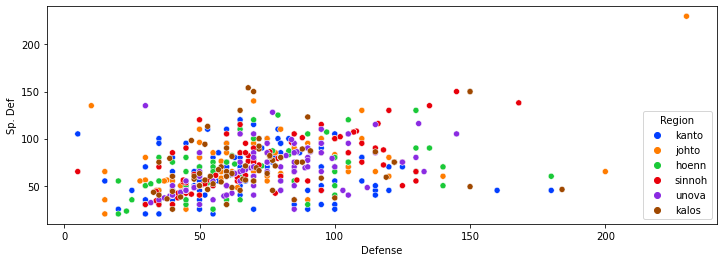

In [162]:
figure9 = sns.scatterplot(data = pokemon, x = "Defense", y= "Sp. Def", hue = "Region", palette = "bright")

With this graph, it is not at all clear, at first glance, it seems that they are equally distributed, that is, that in all regions, the pokemon are similar in defenses. Let's find **another way** to look at it.

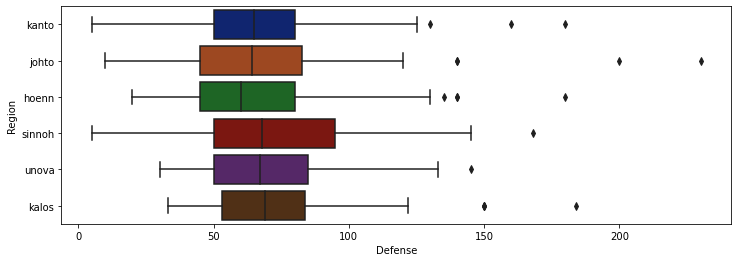

In [163]:
figure10 = sns.boxplot(data = pokemon, x = "Defense", y = "Region", palette = "dark")

So much better, as we see, it **seems** that **all regions** move in the **same values with respect to defense**. However, it seems that **Hoenn** is the region where the pokemon have **less physical defense**.

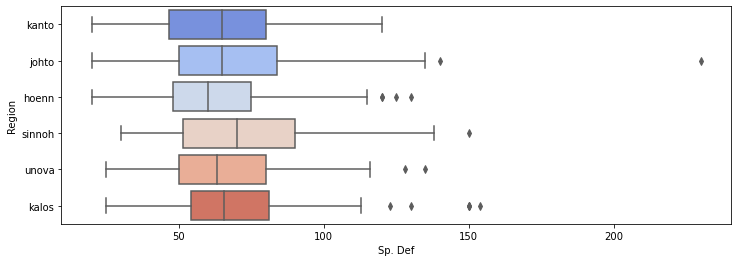

In [164]:
figure11 = sns.boxplot(data = pokemon, x = "Sp. Def", y = "Region", palette = "coolwarm")

We can see that, in general, the values of **all regions have decreased with respect to the previous one**. Hoenn follows behind. Well, in **Hoenn** there were a good number of pokemon, and it seems that they are less resistant than in other regions.

It seems that the decision has been made. But, there is something I want to analyze, how many **dragon type** pokemon will be in the **regions**. The dragon type pokemon, as we have seen, are among the rarest, and the more species there are, the more chances we will have to encounter one.

In [151]:
dragon_type = pokemon[(pokemon["Type 1"] == "Dragon") | (pokemon["Type 2"] == "Dragon")]
#select the dragon type, and keep in a variable

In [152]:
dragon_type

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Evolution,Region
143,147,Dratini,Dragon,NaN,41,64,45,50,50,50,1,Base,kanto
144,148,Dragonair,Dragon,NaN,61,84,65,70,70,70,1,Level_up,kanto
145,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,Level_up,kanto
225,230,Kingdra,Water,Dragon,75,95,95,95,95,85,2,Trade,johto
319,329,Vibrava,Ground,Dragon,50,70,50,50,50,70,3,Level_up,hoenn
320,330,Flygon,Ground,Dragon,80,100,80,80,80,100,3,Level_up,hoenn
324,334,Altaria,Dragon,Flying,75,70,90,70,105,80,3,Level_up,hoenn
361,371,Bagon,Dragon,NaN,45,75,60,40,30,50,3,Base,hoenn
362,372,Shelgon,Dragon,NaN,65,95,100,60,50,50,3,Level_up,hoenn
363,373,Salamence,Dragon,Flying,95,135,80,110,80,100,3,Level_up,hoenn


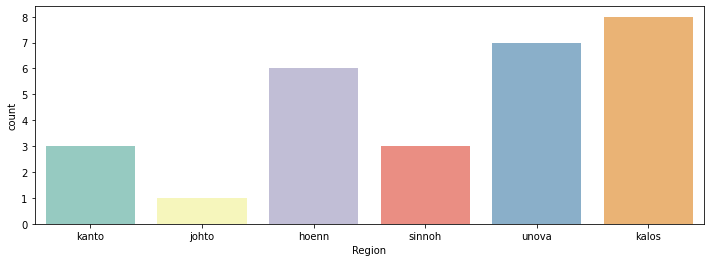

In [165]:
figure12= sns.countplot(data = dragon_type, x = "Region", palette = "Set3")
#check the data and the graphic

In **Kalos** is where there are more **dragon types**, followed closely by **Unova**. **Hoenn**, our chosen region also has a good number of dragon types. 
So finally, yes, we are going to Hoenn!!!!

Finally, we need to get to know our partners, and how they evolve, if they do. To do this, let's look at the **type of evolution**.

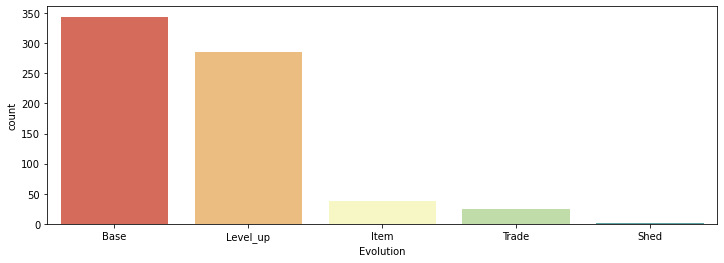

In [166]:
figure13 = sns.countplot(data=pokemon, x = "Evolution", palette = "Spectral")

There seem to be many that are **base** pokemon. But most of the evolutions are per **level**. So, if we get more companions it is very likely to evolve by level. Will the **evolution** influence the **HP**?

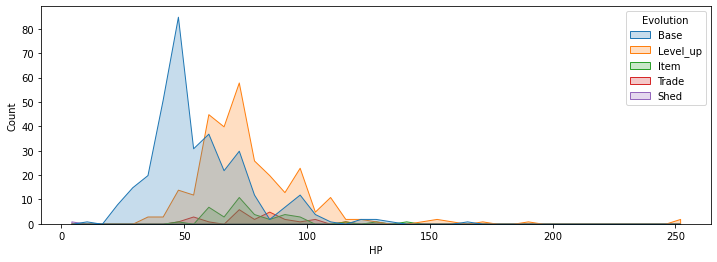

In [167]:
figure14 = sns.histplot(data = pokemon, x = "HP", hue = "Evolution", element = "poly")

It seems that no, all evolution types move at the same HP levels, except for the base pokemon that usually have less.

###### Well, with all this, we are ready to go with Bulbasaur and start our adventure!!!

In [168]:
figure1.figure.savefig("f1typesmean.jpg", dpi=100)

In [169]:
figure2.figure.savefig("f2starterline.jpg", dpi=100)

In [170]:
figure3.figure.savefig("f3starterbar.jpg", dpi=100)

In [171]:
figure4.figure.savefig("f4bulbasaurstats.jpg", dpi=100)

In [172]:
figure5.figure.savefig("f5maintype.jpg", dpi=100)

In [185]:
figure6.figure.savefig("f6secondtype.jpg", dpi=100)

In [186]:
figure7.figure.savefig("f7sumtypes.jpg", dpi=100)

In [175]:
figure8.figure.savefig("f8region.jpg", dpi=100)

In [176]:
figure9.figure.savefig("f9scatterregiondef.jpg", dpi=100)

In [177]:
figure10.figure.savefig("f10regiondef.jpg", dpi=100)

In [178]:
figure11.figure.savefig("f11regionspdef.jpg", dpi=100)

In [179]:
figure12.figure.savefig("f12dragonregion.jpg", dpi=100)

In [180]:
figure13.figure.savefig("f13evolution.jpg", dpi=100)

In [181]:
figure14.figure.savefig("f14evolution_hp.jpg", dpi=100)